In [26]:
#取数据集
from sklearn.datasets import load_svmlight_file

def get_data():
    data = load_svmlight_file("australian_scale")
    return data[0], data[1]

X, y = get_data()

In [27]:
#分割数据集
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#获取训练与验证样本个数及自变量维度
ntr,D=np.array(X_train.shape)
nte=np.array(y_test.shape)[0]

In [28]:
#初始化参数
W=np.random.rand(D)
b=np.random.rand(1)
#输出初始化结果
print(W)
print(b)

[ 0.18770402  0.07654779  0.56132205  0.04527233  0.05286663  0.26056477
  0.63776545  0.766713    0.52608136  0.85385493  0.83666299  0.10988163
  0.47803412  0.3913643 ]
[ 0.29949687]


7.89327186637
2.36456842678


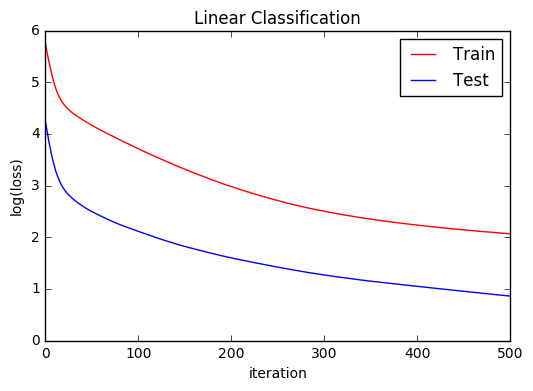

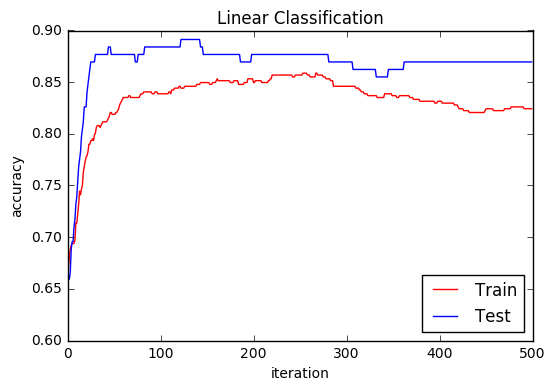

In [29]:
#迭代更新
import matplotlib.pyplot as plt
it=500
plt.figure(1)
L=np.zeros(it)
L0=np.zeros(it)
ac=np.zeros(it)
ac0=np.zeros(it)
for i in range(it):
    y_pre=X_train*W.T+b
    #计算训练集loss值
    L[i]=sum(np.max([[0]*ntr,-y_pre*y_train],axis=0))
    res=y_pre*y_train
    #计算训练集分类精确度
    ac[i]=np.array((res[res>0].shape))/ntr
    #计算梯度相反数
    D=np.max([[0]*ntr,-y_pre*y_train],axis=0)*y_train*X_train
    #更新权值
    W=W+0.0001*D
    b=b+0.0001*np.sum(y_train*np.max([[0]*ntr,-y_pre*y_train],axis=0))
    #预测验证集
    y_pre_test=X_test*W.T+b
    #计算验证集loss
    L0[i]=sum(np.max([[0]*nte,-y_pre_test*y_test],axis=0))
    res0=y_pre_test*y_test
    #计算验证集分类精确度
    ac0[i]=np.array((res0[res0>0].shape))/nte
#输出loss
print(L[-1])
print(L0[-1])
#画出loss的对数随迭代次数的变化
plt.plot(np.log(L),color='r',label='Train')
plt.plot(np.log(L0),label='Test')
plt.ylabel('log(loss)')
plt.xlabel('iteration')
plt.title('Linear Classification')
plt.legend()
plt.show()
plt.figure(2)
#画出精确度随迭代次数的变化
plt.plot(ac,color='r',label='Train')
plt.plot(ac0,label='Test')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.title('Linear Classification')
plt.legend(loc='lower right')
plt.show()